In [1]:
import h5py
import numpy as np
import pylab as mplot
%pylab  inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
photometry = h5py.File('/global/homes/c/chihway/TXPipe/data/example/inputs/photometry_catalog.hdf5','r')
mlz = h5py.File('/global/homes/c/chihway/TXPipe/data/example/outputs/photoz_pdfs_mlz.hdf5','r')
flexzpipe = h5py.File('/global/homes/c/chihway/TXPipe/data/example/outputs/photoz_pdfs_flexzpipe.hdf5','r')

In [5]:
print(mlz['pdf'].keys())
print(flexzpipe['pdf'].keys())

print(mlz['point_estimates'].keys())
print(flexzpipe['point_estimates'].keys())

<KeysViewHDF5 ['pdf', 'zgrid']>
<KeysViewHDF5 ['pdf', 'zgrid']>
<KeysViewHDF5 ['z_mean']>
<KeysViewHDF5 ['ODDS', 'z_mean', 'z_median', 'z_mode', 'z_mode_ml', 'z_mode_ml_red_chi2']>


In [12]:
z_mlz = mlz['pdf/zgrid'].value
pdf_mlz = mlz['pdf/pdf'].value
z_flexzpipe = flexzpipe['pdf/zgrid'].value
pdf_flexzpipe = flexzpipe['pdf/pdf'].value
zmean_mlz = mlz['point_estimates/z_mean'].value
zmean_flexzpipe = flexzpipe['point_estimates/z_mean'].value

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  from ipykernel import kernelapp as app
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  app.launch_new_instance()
/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
/global/common/software/lsst/common/miniconda/py3.7-4.7.12

In [13]:
z_true = photometry['photometry/redshift_true'].value

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':


(array([ 4399., 10109., 15058., 16837., 11817.,  9247.,  6491.,  4221.,
         2570.,  1451.]),
 array([0.02681482, 0.32773837, 0.62866192, 0.92958547, 1.23050902,
        1.53143257, 1.83235612, 2.13327967, 2.43420322, 2.73512677,
        3.03605032]),
 <a list of 10 Patch objects>)

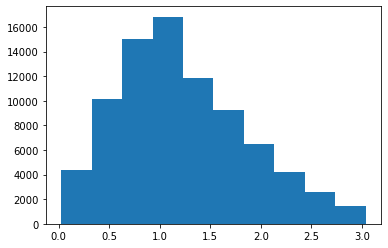

In [14]:
mplot.hist(z_true)

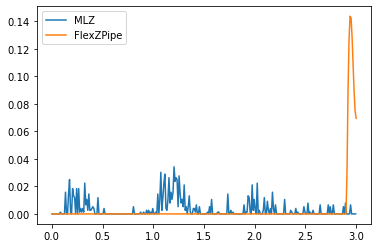

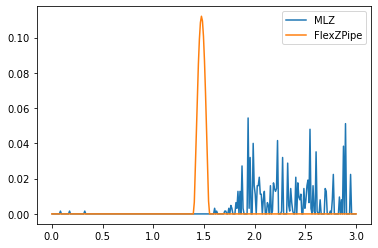

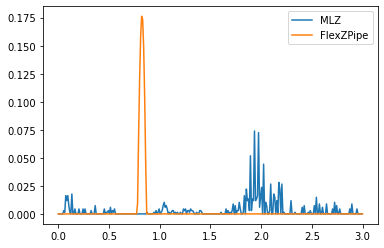

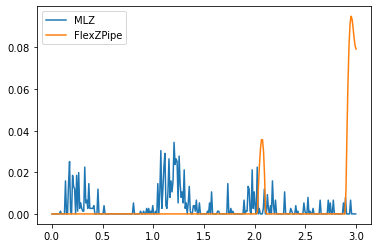

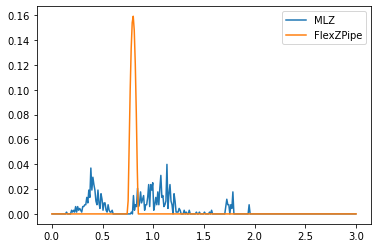

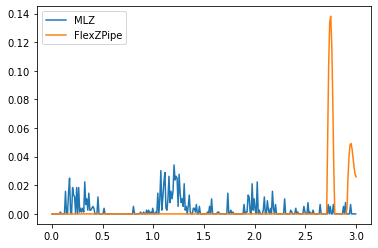

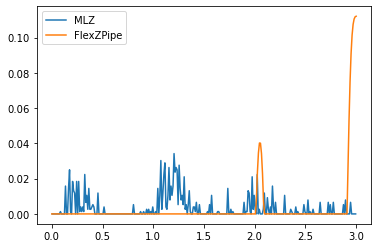

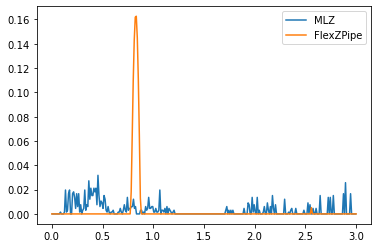

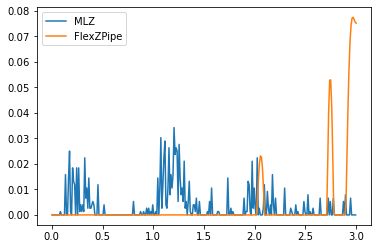

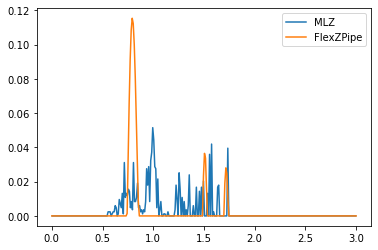

In [15]:
Z=[]
Zmlz=[]
Zflexzpipe=[]
ids = np.arange(len(z_true))
np.random.shuffle(ids)
for ii in range(10):
    i = ids[ii]
    mplot.figure()
    mplot.plot(z_mlz, pdf_mlz[i]/np.sum(pdf_mlz[i]), label='MLZ')
    mplot.plot(z_flexzpipe, pdf_flexzpipe[i]/np.sum(pdf_flexzpipe[i]), label='FlexZPipe')
    mplot.legend()
    
    Z.append(z_true[i])
    Zmlz.append(zmean_mlz[i])
    Zflexzpipe.append(zmean_flexzpipe[i])
    

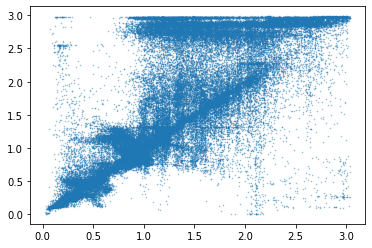

In [21]:
# mplot.scatter(Z, Zmlz)
# mplot.scatter(Z, Zflexzpipe)
mplot.scatter(z_true, zmean_flexzpipe, s=1, marker='.', alpha=0.5)

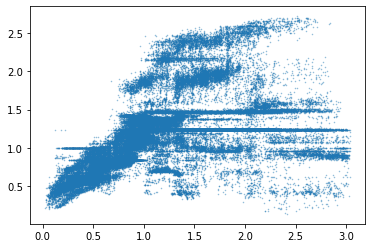

In [22]:
mplot.scatter(z_true, zmean_mlz, s=1, marker='.', alpha=0.5)

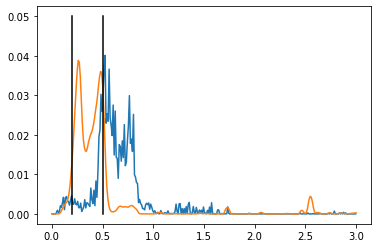

In [17]:
mask = (z_true>0.2)*(z_true<0.5)

mlz_stack = np.sum(pdf_mlz[mask], axis=0)
flexzpipe_stack = np.sum(pdf_flexzpipe[mask], axis=0)

mplot.plot(z_mlz, mlz_stack/np.sum(mlz_stack))
mplot.plot(z_flexzpipe, flexzpipe_stack/np.sum(flexzpipe_stack))
mplot.plot([0.2,0.2],[0.0,0.05], color='k')
mplot.plot([0.5,0.5],[0.0,0.05], color='k')